In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor, ToPILImage
import cv2

In [2]:
# CNN Network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) # 3=>input channel 6=>output channel 5=>kernal_size
        self.pool = nn.MaxPool2d(2,2) # Maxpooling(2*2)
        self.conv2 = nn.Conv2d(6,16,5) # layer2 6=>input channel 16=>output channel 5=>kernal size
        self.fc1 = nn.Linear(16*5*5,120) 
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,3) # 3 dimension output = good bad none
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5) #拉平
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
epochs = 1000
cnn = CNN()
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9) # Gradient Descent learning rate = 0.001

In [4]:
df = pd.read_csv('train.csv') 

In [6]:
# Train
CrossEntropyloss = []
epo = []
for epoch in range(30):
    running_loss = 0.0
    Lloss = 0.0
    epo.append(epoch)
    for i in range(len(df)):
        origpic = cv2.imread(df.iloc[i,0]) # 讀取圖片
        xmin = df.iloc[i,4]
        ymin = df.iloc[i,5]
        xmax = df.iloc[i,6]
        ymax = df.iloc[i,7]
        origpic = origpic[ymin:ymax,xmin:xmax]#框框大小
        pic = cv2.cvtColor(origpic, cv2.COLOR_BGR2RGB) #色彩空間轉換opencv預設為:(BGR)=>RGB
        pic = cv2.resize(origpic,(32,32)) #Resize(32*32*3)
        to_tensor = ToTensor()#維度轉換(3*32*32)
        pic = to_tensor(pic).unsqueeze(0) #(1*3*32*32)
        optimizer.zero_grad() # 初始化 Gradient
        output = cnn(pic) #開始訓練
        if df.iloc[i,3]=='good':
            label = torch.Tensor([0]).long()
        elif df.iloc[i,3]=='bad':
            label = torch.Tensor([1]).long()
        elif df.iloc[i,3]=='none':
            label = torch.Tensor([2]).long()
        _, predicted = torch.max(output, 1)#出來兩個東西只要後面predict
        loss = criterion(output,label) # Calculate Loss
        #loss = loss*weight
        loss.backward()  #Back propagation
        optimizer.step() # Update the parameters
        running_loss+=loss.item() # accumulate loss
        Lloss+=loss.item()
        if i%100==99:
            print('[%d, %5d] loss: %.3f'%(epoch+1,i+1,running_loss/100))
            running_loss = 0.0
    CrossEntropyloss.append(Lloss/100)
    
    
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for i in range(len(df)):
#             origpic = cv2.imread(df.iloc[i,0])
#             xmin = df.iloc[i,4]
#             ymin = df.iloc[i,5]
#             xmax = df.iloc[i,6]
#             ymax = df.iloc[i,7]
#             origpic = origpic[ymin:ymax,xmin:xmax]
#             pic = cv2.cvtColor(origpic, cv2.COLOR_BGR2RGB)
#             pic = cv2.resize(origpic,(32,32))
#             to_tensor = ToTensor()
#             pic = to_tensor(pic).unsqueeze(0)
#             optimizer.zero_grad()
#             if df.iloc[i,3]=='good':
#                 label = torch.Tensor([0]).long()
#             elif df.iloc[i,3]=='bad':
#                 label = torch.Tensor([1]).long()   
#             elif df.iloc[i,3]=='none':
#                 label = torch.Tensor([2]).long()
#             output = cnn(img)
#             _, predicted = torch.max(output.data, 1)
#             total += label.size(0)
#             correct += (predicted == label).sum().item()
#         trainingacc.append((100*correct / total))
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for i in range(len(df2)):
#             origpic = cv2.imread(df2.iloc[i,0])
#             xmin = df2.iloc[i,4]
#             ymin = df2.iloc[i,5]
#             xmax = df2.iloc[i,6]
#             ymax = df2.iloc[i,7]
#             origpic = origpic[ymin:ymax,xmin:xmax]
#             pic = cv2.cvtColor(origpic, cv2.COLOR_BGR2RGB)
#             pic = cv2.resize(origpic,(32,32))
#             to_tensor = ToTensor()
#             img = to_tensor(pic).unsqueeze(0)
#             optimizer.zero_grad()
#             if df2.iloc[i,3]=='good':
#                 label = torch.Tensor([0]).long()
#             elif df2.iloc[i,3]=='bad':
#                 label = torch.Tensor([1]).long()   
#             elif df2.iloc[i,3]=='none':
#                 label = torch.Tensor([2]).long()
#             output = cnn(pic)
#             _, predicted = torch.max(output.data, 1)
#             total += label.size(0)
#             correct += (predicted == label).sum().item()
#         testacc.append((100*correct / total))
print("Finished Training")

[1,   100] loss: 0.908
[1,   200] loss: 0.666
[1,   300] loss: 0.739
[1,   400] loss: 0.608
[1,   500] loss: 0.820
[1,   600] loss: 0.673
[1,   700] loss: 0.429
[1,   800] loss: 0.571
[1,   900] loss: 0.520
[1,  1000] loss: 0.519
[1,  1100] loss: 0.641
[1,  1200] loss: 0.341
[1,  1300] loss: 0.809
[1,  1400] loss: 0.507
[1,  1500] loss: 0.623
[1,  1600] loss: 0.627
[1,  1700] loss: 0.486
[1,  1800] loss: 0.481
[1,  1900] loss: 0.340
[1,  2000] loss: 0.286
[1,  2100] loss: 0.432
[1,  2200] loss: 0.669
[1,  2300] loss: 0.623
[1,  2400] loss: 0.663
[1,  2500] loss: 0.560
[1,  2600] loss: 0.548
[1,  2700] loss: 0.461
[1,  2800] loss: 0.368
[1,  2900] loss: 0.424
[1,  3000] loss: 0.366
[1,  3100] loss: 0.633
[1,  3200] loss: 0.972
[1,  3300] loss: 0.710
[1,  3400] loss: 0.599
[1,  3500] loss: 0.607
[2,   100] loss: 0.605
[2,   200] loss: 0.564
[2,   300] loss: 0.635
[2,   400] loss: 0.520
[2,   500] loss: 0.690
[2,   600] loss: 0.607
[2,   700] loss: 0.442
[2,   800] loss: 0.550
[2,   900] 

[11,   500] loss: 0.243
[11,   600] loss: 0.161
[11,   700] loss: 0.106
[11,   800] loss: 0.229
[11,   900] loss: 0.088
[11,  1000] loss: 0.166
[11,  1100] loss: 0.179
[11,  1200] loss: 0.087
[11,  1300] loss: 0.129
[11,  1400] loss: 0.124
[11,  1500] loss: 0.180
[11,  1600] loss: 0.186
[11,  1700] loss: 0.213
[11,  1800] loss: 0.124
[11,  1900] loss: 0.118
[11,  2000] loss: 0.069
[11,  2100] loss: 0.277
[11,  2200] loss: 0.132
[11,  2300] loss: 0.162
[11,  2400] loss: 0.217
[11,  2500] loss: 0.142
[11,  2600] loss: 0.086
[11,  2700] loss: 0.153
[11,  2800] loss: 0.057
[11,  2900] loss: 0.024
[11,  3000] loss: 0.049
[11,  3100] loss: 0.195
[11,  3200] loss: 0.292
[11,  3300] loss: 0.166
[11,  3400] loss: 0.136
[11,  3500] loss: 0.184
[12,   100] loss: 0.092
[12,   200] loss: 0.161
[12,   300] loss: 0.229
[12,   400] loss: 0.369
[12,   500] loss: 0.240
[12,   600] loss: 0.182
[12,   700] loss: 0.107
[12,   800] loss: 0.193
[12,   900] loss: 0.090
[12,  1000] loss: 0.164
[12,  1100] loss

[20,  3100] loss: 0.078
[20,  3200] loss: 0.097
[20,  3300] loss: 0.078
[20,  3400] loss: 0.008
[20,  3500] loss: 0.089
[21,   100] loss: 0.065
[21,   200] loss: 0.127
[21,   300] loss: 0.135
[21,   400] loss: 0.214
[21,   500] loss: 0.172
[21,   600] loss: 0.066
[21,   700] loss: 0.055
[21,   800] loss: 0.146
[21,   900] loss: 0.043
[21,  1000] loss: 0.058
[21,  1100] loss: 0.104
[21,  1200] loss: 0.020
[21,  1300] loss: 0.030
[21,  1400] loss: 0.109
[21,  1500] loss: 0.078
[21,  1600] loss: 0.105
[21,  1700] loss: 0.169
[21,  1800] loss: 0.079
[21,  1900] loss: 0.095
[21,  2000] loss: 0.024
[21,  2100] loss: 0.217
[21,  2200] loss: 0.052
[21,  2300] loss: 0.088
[21,  2400] loss: 0.165
[21,  2500] loss: 0.090
[21,  2600] loss: 0.059
[21,  2700] loss: 0.154
[21,  2800] loss: 0.018
[21,  2900] loss: 0.042
[21,  3000] loss: 0.034
[21,  3100] loss: 0.084
[21,  3200] loss: 0.075
[21,  3300] loss: 0.062
[21,  3400] loss: 0.006
[21,  3500] loss: 0.098
[22,   100] loss: 0.018
[22,   200] loss

[30,  2200] loss: 0.121
[30,  2300] loss: 0.102
[30,  2400] loss: 0.172
[30,  2500] loss: 0.086
[30,  2600] loss: 0.080
[30,  2700] loss: 0.157
[30,  2800] loss: 0.050
[30,  2900] loss: 0.029
[30,  3000] loss: 0.054
[30,  3100] loss: 0.111
[30,  3200] loss: 0.096
[30,  3300] loss: 0.067
[30,  3400] loss: 0.013
[30,  3500] loss: 0.066
Finished Training


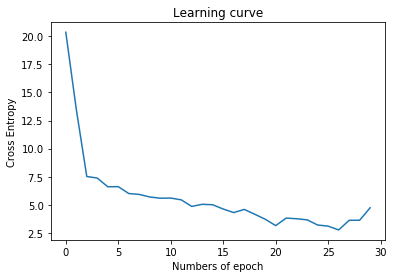

In [8]:
plt.plot(epo,CrossEntropyloss)
plt.title("Learning curve")
plt.xlabel("Numbers of epoch")
plt.ylabel("Cross Entropy")
plt.show()

In [16]:
# Test
correct = 0
total = 0

with torch.no_grad():
    for i in range(len(df2)):
        origpic = cv2.imread(df2.iloc[i,0])
        xmin = df2.iloc[i,4]
        ymin = df2.iloc[i,5]
        xmax = df2.iloc[i,6]
        ymax = df2.iloc[i,7]
        origpic = origpic[ymin:ymax,xmin:xmax]
        pic = cv2.cvtColor(origpic, cv2.COLOR_BGR2RGB)
        pic = cv2.resize(origpic,(32,32))
        to_tensor = ToTensor()
        pic = to_tensor(pic).unsqueeze(0)
        optimizer.zero_grad()
        if df2.iloc[i,3]=='good':
            label = torch.Tensor([0]).long()
        elif df2.iloc[i,3]=='bad':
            label = torch.Tensor([1]).long()   
        elif df2.iloc[i,3]=='none':
            label = torch.Tensor([2]).long()
        output = cnn(pic)
        _, predicted = torch.max(output.data, 1)
        print(predicted,output)
        total += label.size(0)
        correct += (predicted == label).sum().item()
        
#     print('Accuracy test images: %d %%' % (100*correct / total))
#     plt.plot(epo[1:],CrossEntropyloss)
#     plt.title("Learning curve")
#     plt.xlabel("Numbers of epoch")
#     plt.ylabel("Cross Entropy")
#     fig = plt.gcf()
#     fig.savefig("learningcurve.png")
#     plt.clf()
#     plt.plot(epo,trainingacc,label = "Training acc")
#     plt.title("Training accuracy")
#     plt.xlabel("Numbers of epoch")
#     plt.ylabel("accuracy")
#     fig = plt.gcf()

#     plt.plot(epo,testacc,label = "Testing acc")
#     plt.title("Accruracy")
#     plt.xlabel("Numbers of epoch")
#     plt.ylabel("accuracy")
#     plt.legend(loc='upper right')
#     fig = plt.gcf()
#     fig.savefig("Accuracy.png")

#     print("Plot completed")
#     ans = {0:"good",1:"bad",2:"none"}
#     class_correct = [0 for i in range(3)]
#     class_total = [0 for i in range(3)]

print('Accuracy: %d %%' % (100*correct / total))

tensor([1]) tensor([[-0.3836,  2.8662, -2.5233]])
tensor([1]) tensor([[-4.9564,  7.2612, -2.6810]])
tensor([1]) tensor([[-3.1181,  6.2658, -3.5852]])
tensor([0]) tensor([[ 6.1408, -3.4486, -3.0551]])
tensor([1]) tensor([[-0.2592,  2.7569, -2.5562]])
tensor([0]) tensor([[ 5.1661, -5.0765, -1.4599]])
tensor([1]) tensor([[ 0.5171,  0.6307, -1.2847]])
tensor([1]) tensor([[ 0.0865,  0.9173, -1.1981]])
tensor([2]) tensor([[ 0.9345, -4.5001,  3.6330]])
tensor([1]) tensor([[-2.7286,  4.4457, -1.9224]])
tensor([1]) tensor([[ 0.7743,  1.7549, -2.6548]])
tensor([0]) tensor([[11.3460, -7.8502, -6.1781]])
tensor([0]) tensor([[ 6.8427, -7.2541, -1.3863]])
tensor([0]) tensor([[ 2.4791, -1.5521, -1.0123]])
tensor([0]) tensor([[ 6.4847, -7.5498, -1.9714]])
tensor([0]) tensor([[ 21.1598, -17.6929,  -9.3902]])
tensor([0]) tensor([[ 1.8705, -1.1361, -1.2736]])
tensor([1]) tensor([[ 0.1322,  3.2184, -3.4780]])
tensor([0]) tensor([[ 6.8749, -4.8101, -3.9522]])
tensor([0]) tensor([[ 3.4797, -3.8034, -0.1593]

tensor([0]) tensor([[ 5.8123, -6.2458, -0.3824]])
tensor([0]) tensor([[ 7.9823, -7.5215, -0.8741]])
tensor([0]) tensor([[ 13.6023, -10.1838,  -5.8369]])
tensor([0]) tensor([[ 4.3167, -3.4538, -1.4785]])
tensor([0]) tensor([[ 15.2544, -11.3286,  -7.6623]])
tensor([0]) tensor([[ 9.5168, -7.0088, -4.6622]])
tensor([0]) tensor([[ 7.7525, -6.8644, -2.7475]])
tensor([0]) tensor([[ 2.3896, -1.7585, -0.8728]])
tensor([0]) tensor([[ 3.6534, -5.0372,  1.7965]])
tensor([0]) tensor([[ 3.1553, -3.5383,  0.4421]])
tensor([0]) tensor([[ 5.1649, -4.7660, -0.5764]])
tensor([2]) tensor([[-3.2024, -0.3323,  3.1706]])
tensor([0]) tensor([[ 2.6925, -1.7872, -1.0919]])
tensor([0]) tensor([[ 3.7317, -4.1642, -0.2644]])
tensor([0]) tensor([[11.0667, -8.3790, -3.5070]])
tensor([0]) tensor([[ 3.2719, -3.4626,  0.4440]])
tensor([0]) tensor([[ 3.8975, -2.7018, -2.0552]])
tensor([0]) tensor([[10.7247, -8.5441, -4.0815]])
tensor([1]) tensor([[ 0.0736,  2.1404, -2.3574]])
tensor([1]) tensor([[ 0.7958,  3.0234, -3.55

tensor([0]) tensor([[ 5.8477, -6.4841,  0.0648]])
tensor([1]) tensor([[-1.9615,  4.7675, -2.9758]])
tensor([2]) tensor([[ -4.5069, -22.8409,  26.8249]])
tensor([0]) tensor([[ 24.0014, -19.1321, -11.6758]])
tensor([0]) tensor([[ 20.5710, -16.9258,  -9.5944]])
tensor([0]) tensor([[ 20.4128, -16.6443,  -9.5119]])
tensor([2]) tensor([[ -2.5699, -24.1434,  26.3535]])
tensor([1]) tensor([[-0.4927,  8.1876, -8.0668]])
tensor([0]) tensor([[ 5.0561, -5.9387, -0.4203]])
tensor([0]) tensor([[ 2.5108, -0.0608, -2.0409]])
tensor([0]) tensor([[ 7.0096, -5.4009, -1.5529]])
tensor([1]) tensor([[-3.1178,  5.6608, -2.5657]])
tensor([1]) tensor([[ 0.6063,  0.9348, -1.6152]])
tensor([0]) tensor([[ 6.0456, -2.1748, -4.4312]])
tensor([2]) tensor([[-2.3624, -0.5033,  3.2181]])
tensor([1]) tensor([[-3.7082,  6.6444, -3.2905]])
tensor([0]) tensor([[ 1.8491, -1.0999, -0.6062]])
tensor([0]) tensor([[ 14.8046, -11.8627,  -4.5442]])
tensor([0]) tensor([[ 5.5994, -7.3815,  0.8295]])
tensor([1]) tensor([[ 1.2342,  2